Model Evaluation - Classification Template

In [1]:
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

from expected_disposal_model.config import modelling_file_path, model_output_path
from expected_disposal_model.modelling_data_contract import ModellingDataContract
from expected_disposal_model.evaluation.model_evaluation import XGBClassifierEvaluator

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

%load_ext autoreload
%autoreload 2

Model

In [2]:
model_version = 1
model_name = "disposal"

Response

In [3]:
RESPONSE = ModellingDataContract.RESPONSE

Features

In [4]:
FEATURES = ModellingDataContract.feature_list

Load Data

In [5]:
modelling_data = pd.read_csv(modelling_file_path)
modelling_data.tail()

,match_id,chain_number,order,quarter,quarter_seconds,overall_seconds,team,player,start_x,start_y,end_x,end_y,action_type,outcome_type,type_Kick_a0,type_Handball_a0,quarter_a0,quarter_seconds_a0,overall_seconds_a0,start_x_a0,start_y_a0,end_x_a0,end_y_a0,dx_a0,dy_a0,movement_a0,type_Kick_a1,type_Handball_a1,outcome_effective_a1,outcome_ineffective_a1,outcome_clanger_a1,quarter_a1,quarter_seconds_a1,overall_seconds_a1,start_x_a1,start_y_a1,end_x_a1,end_y_a1,dx_a1,dy_a1,movement_a1,type_Kick_a2,type_Handball_a2,outcome_effective_a2,outcome_ineffective_a2,outcome_clanger_a2,quarter_a2,quarter_seconds_a2,overall_seconds_a2,start_x_a2,start_y_a2,end_x_a2,end_y_a2,dx_a2,dy_a2,movement_a2,team_1,team_2,time_delta1,time_delta2,dx_a01,dy_a01,move_a01,dx_a02,dy_a02,move_a02,Disposal,DisposalTrainingSet,DisposalTestSet,DisposalValidationSet
427203,2023F4_Collingwood_BrisbaneLions,240,1845.0,4,1771.0,7759.0,Collingwood,Scott Pendlebury,-45.0,-38.0,-27.0,-35.0,Kick,effective,True,False,4,1771.0,7759.0,-45.0,-38.0,-27.0,-35.0,18.0,3.0,18.248288,False,False,True,False,False,4,1769.0,7757.0,-46.0,-38.0,-45.0,-38.0,1.0,0.0,1.000000,True,False,True,False,False,4,1768.0,7756.0,-23.0,-35.0,-46.0,-38.0,-23.0,-3.0,23.194827,True,True,-2.0,-3.0,0.0,0.0,0.0,-1.0,0.0,1.000000,1,False,True,False
427204,2023F4_Collingwood_BrisbaneLions,240,1847.0,4,1779.0,7767.0,Collingwood,Tom Mitchell,-29.0,-34.0,-46.0,-48.0,Kick,effective,True,False,4,1779.0,7767.0,-29.0,-34.0,-46.0,-48.0,-17.0,-14.0,22.022716,False,False,True,False,False,4,1773.0,7761.0,-27.0,-35.0,-29.0,-34.0,-2.0,1.0,2.236068,True,False,True,False,False,4,1771.0,7759.0,-45.0,-38.0,-27.0,-35.0,18.0,3.0,18.248288,True,True,-6.0,-8.0,0.0,0.0,0.0,2.0,-1.0,2.236068,1,True,False,False
427205,2023F4_Collingwood_BrisbaneLions,240,1849.0,4,1788.0,7776.0,Collingwood,Brody Mihocek,-49.0,-48.0,16.0,-63.0,Kick,effective,True,False,4,1788.0,7776.0,-49.0,-48.0,16.0,-63.0,65.0,-15.0,66.708320,False,False,True,False,False,4,1780.0,7768.0,-46.0,-48.0,-49.0,-48.0,-3.0,0.0,3.000000,True,False,True,False,False,4,1779.0,7767.0,-29.0,-34.0,-46.0,-48.0,-17.0,-14.0,22.022716,True,True,-8.0,-9.0,0.0,0.0,0.0,3.0,0.0,3.000000,1,True,False,False
427206,2023F4_Collingwood_BrisbaneLions,240,1852.0,4,1794.0,7782.0,Collingwood,Will Hoskin-Elliott,14.0,-52.0,26.0,-47.0,Kick,ineffective,True,False,4,1794.0,7782.0,14.0,-52.0,26.0,-47.0,12.0,5.0,13.000000,False,False,True,False,False,4,1793.0,7781.0,14.0,-53.0,14.0,-52.0,0.0,1.0,1.000000,False,False,True,False,False,4,1792.0,7780.0,16.0,-63.0,14.0,-53.0,-2.0,10.0,10.198039,True,True,-1.0,-2.0,0.0,0.0,0.0,0.0,-1.0,1.000000,0,False,True,False
427207,2023F4_Collingwood_BrisbaneLions,240,1853.0,4,1805.0,7793.0,Collingwood,Will Hoskin-Elliott,26.0,-47.0,26.0,-47.0,Kick,effective,True,False,4,1805.0,7793.0,26.0,-47.0,26.0,-47.0,0.0,0.0,0.000000,True,False,False,True,False,4,1794.0,7782.0,14.0,-52.0,26.0,-47.0,12.0,5.0,13.000000,False,False,True,False,False,4,1793.0,7781.0,14.0,-53.0,14.0,-52.0,0.0,1.0,1.000000,True,True,-11.0,-12.0,0.0,0.0,0.0,-12.0,-5.0,13.000000,1,True,False,False


In [6]:
training_data = modelling_data[modelling_data[RESPONSE+"TrainingSet"]]
test_data = modelling_data[modelling_data[RESPONSE+"TestSet"]]
cal_data = modelling_data[modelling_data[RESPONSE+"ValidationSet"]]

In [7]:
X_train, y_train = training_data.drop(columns=[RESPONSE]), training_data[RESPONSE]
X_test, y_test = test_data.drop(columns=[RESPONSE]), test_data[RESPONSE]
X_cal, y_cal = cal_data.drop(columns=[RESPONSE]), cal_data[RESPONSE]

In [8]:
X_train_preproc = X_train[FEATURES]
X_test_preproc = X_test[FEATURES]

Load Model

In [9]:
super_xgb = joblib.load(model_output_path + "/" + model_name + "_v" + str(model_version) + ".joblib")

In [10]:
super_xgb.xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8157949738034416, device=None,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.20151244347593691,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4407782051144824,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=36, missing=nan, monotone_constraints={},
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Get Predictions

In [11]:
train_preds = super_xgb.predict(X_train_preproc)
test_preds = super_xgb.predict(X_test_preproc)

In [12]:
train_probas = super_xgb.predict_proba(X_train_preproc)[:, 1]
test_probas = super_xgb.predict_proba(X_test_preproc)[:, 1]

In [13]:
train_cal_probas = super_xgb.predict_proba(X_train_preproc, calibrate=True)
test_cal_probas = super_xgb.predict_proba(X_test_preproc, calibrate=True)

Evaluate Model

In [14]:
training_data['xgb_preds'] = train_preds
training_data['xgb_probas'] = train_probas
training_data['xgb_cal_probas'] = train_cal_probas

train_xgb_evals = XGBClassifierEvaluator(model = super_xgb.xgb_model,
                                       data = training_data,
                                       actual_name = RESPONSE,
                                       expected_name = "xgb_cal_probas",
                                       expected_label_name = "xgb_preds"
                                       )

In [15]:
test_data['xgb_preds'] = test_preds
test_data['xgb_probas'] = test_probas
test_data['xgb_cal_probas'] = test_cal_probas

test_xgb_evals = XGBClassifierEvaluator(model = super_xgb.xgb_model,
                                       data = test_data,
                                       actual_name = RESPONSE,
                                       expected_name = "xgb_cal_probas",
                                       expected_label_name = "xgb_preds"
                                       )

Model Averages

In [16]:
training_data[[RESPONSE, 'xgb_probas', 'xgb_cal_probas']].describe()

,Disposal,xgb_probas,xgb_cal_probas
count,273412.000000,273412.000000,273412.000000
mean,0.743746,0.743251,0.741556
std,0.436565,0.332709,0.327138
min,0.000000,0.000323,0.000322
25%,0.000000,0.626753,0.637823
50%,1.000000,0.925635,0.915793
75%,1.000000,0.976533,0.969466
max,1.000000,0.999432,0.998844


In [17]:
test_data[[RESPONSE, 'xgb_probas', 'xgb_cal_probas']].describe()

,Disposal,xgb_probas,xgb_cal_probas
count,85442.000000,85442.000000,85442.000000
mean,0.743346,0.742603,0.740940
std,0.436789,0.332857,0.327288
min,0.000000,0.000358,0.000358
25%,0.000000,0.623562,0.634878
50%,1.000000,0.924995,0.915154
75%,1.000000,0.976568,0.969506
max,1.000000,0.999301,0.998612


Plots

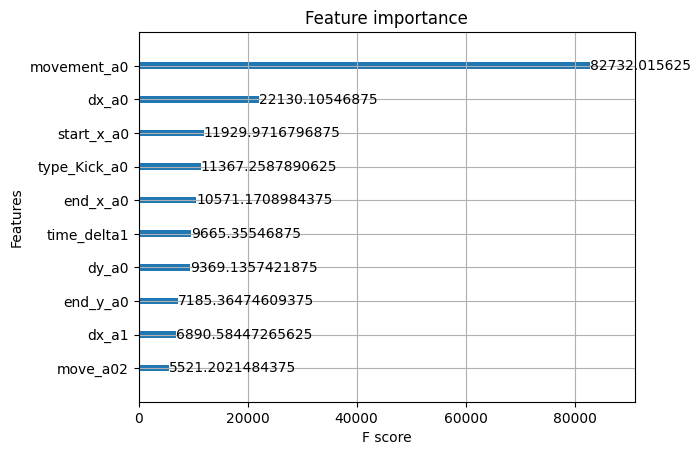

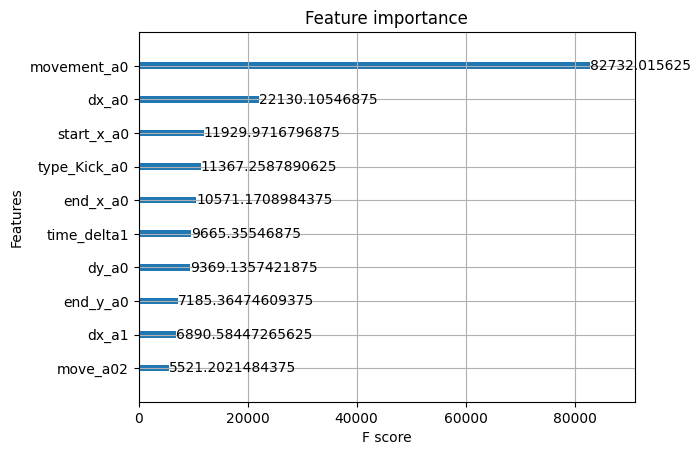

In [18]:
train_xgb_evals.plot_feature_importance(max_num_features=10, importance_type="total_gain")
test_xgb_evals.plot_feature_importance(max_num_features=10, importance_type="total_gain")

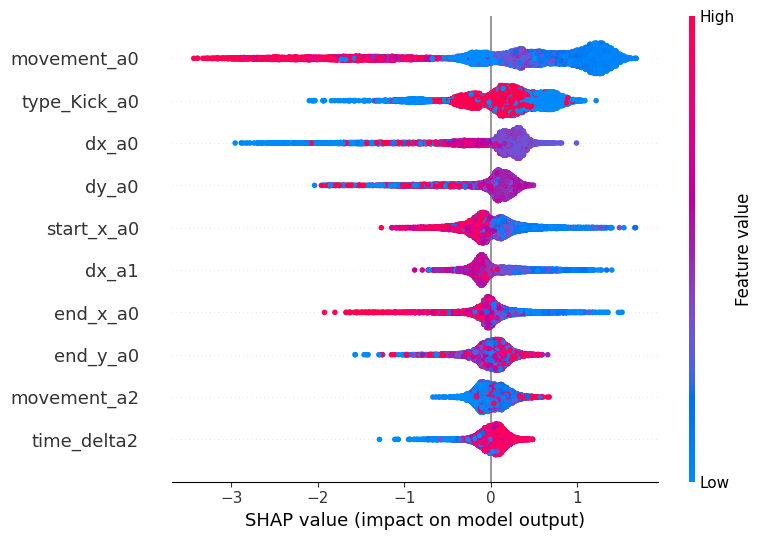

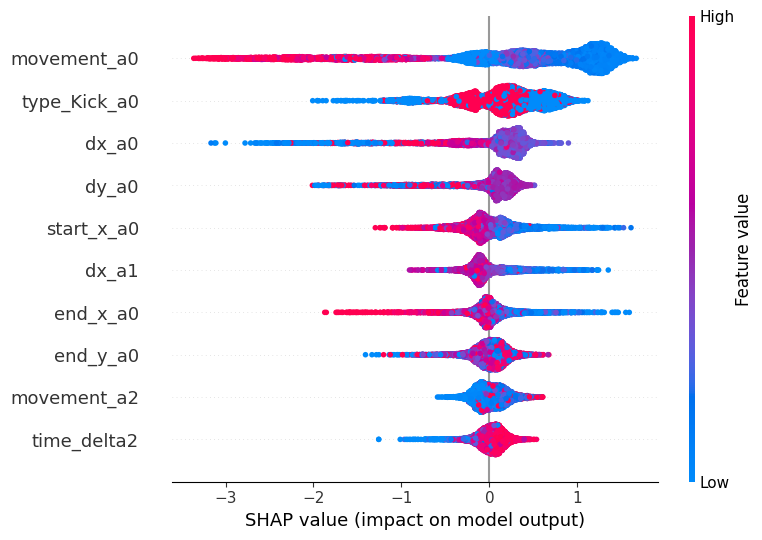

In [19]:
train_xgb_evals.plot_shap_summary_plot()
test_xgb_evals.plot_shap_summary_plot()

In [20]:
top_features = test_xgb_evals.get_ranked_feature_importance()
top_10_features = top_features[:10]
top_10_features

['movement_a0',
 'type_Kick_a0',
 'dx_a0',
 'dy_a0',
 'start_x_a0',
 'dx_a1',
 'end_x_a0',
 'end_y_a0',
 'movement_a2',
 'time_delta2']

In [21]:
# for col in top_10_features:
#     train_xgb_evals.plot_pdp([col])
#     test_xgb_evals.plot_pdp([col])

In [22]:
# for col in top_10_features:
#     train_xgb_evals.plot_ice([col])
#     test_xgb_evals.plot_ice([col])

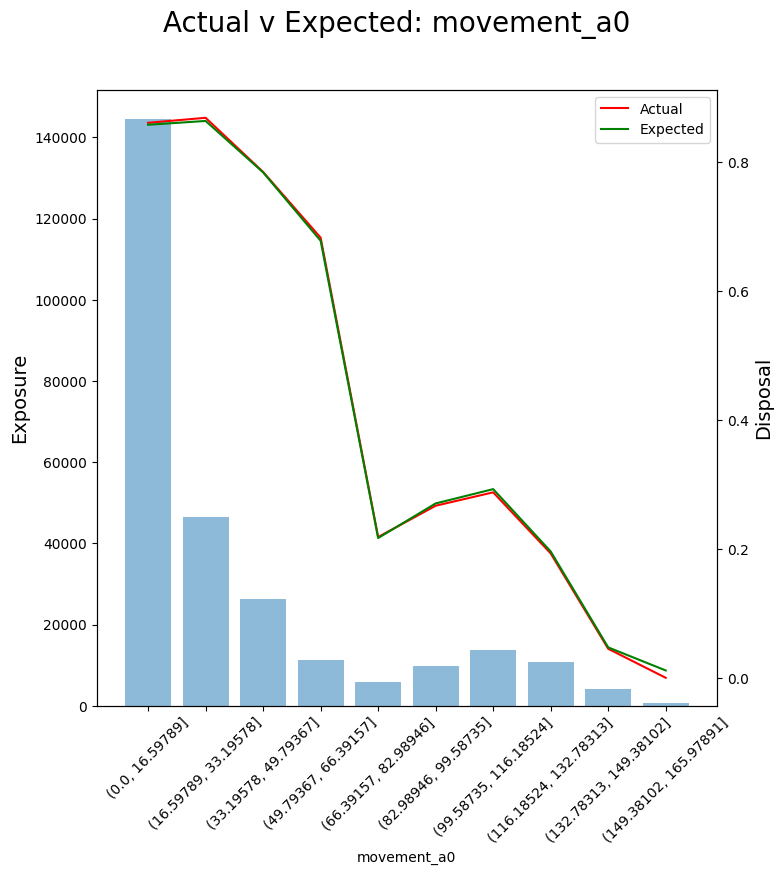

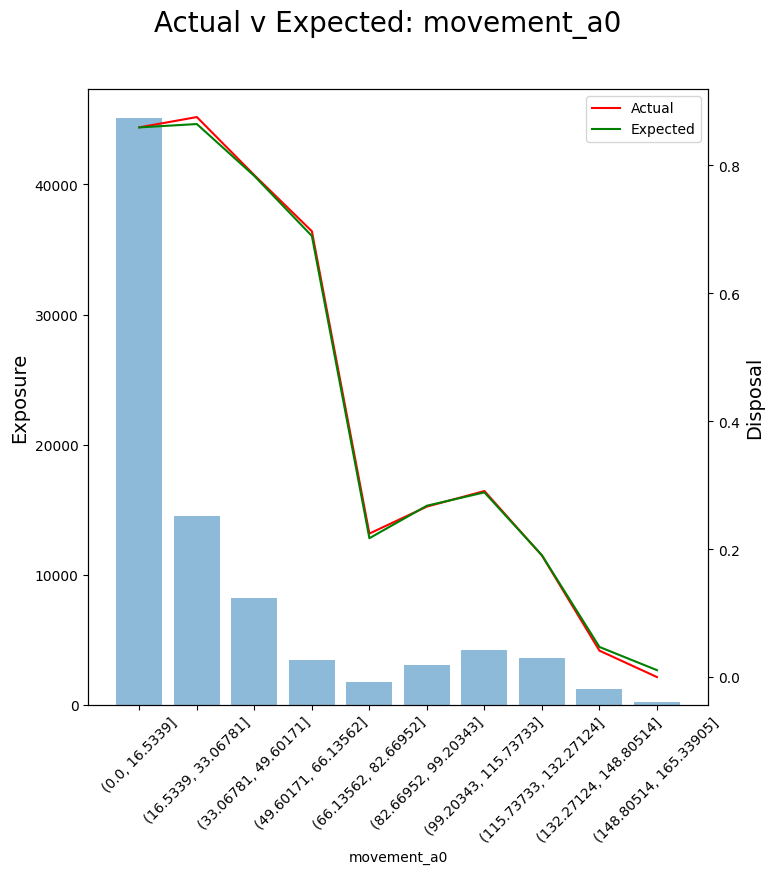

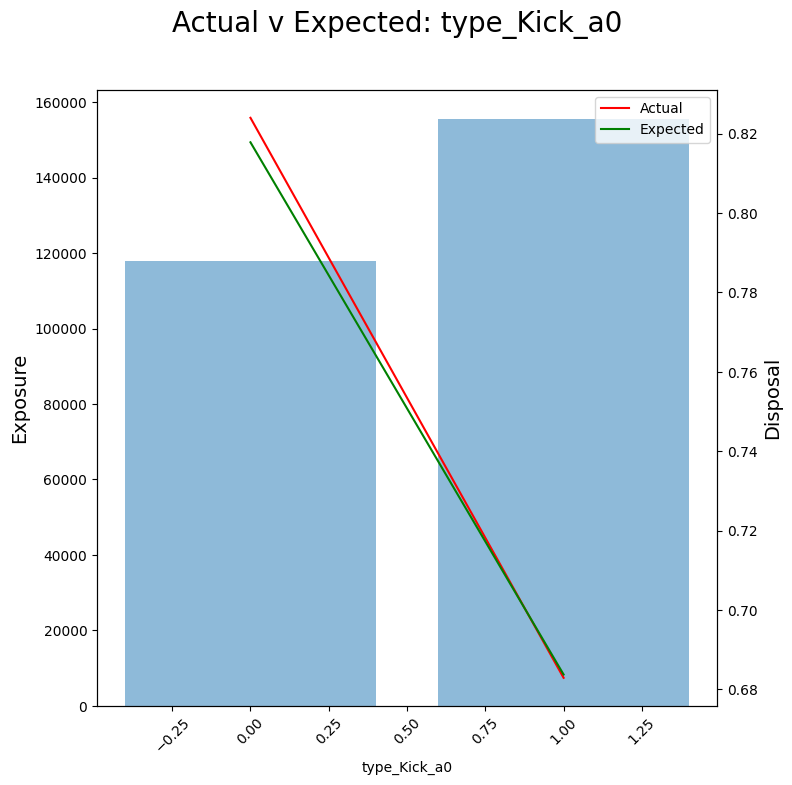

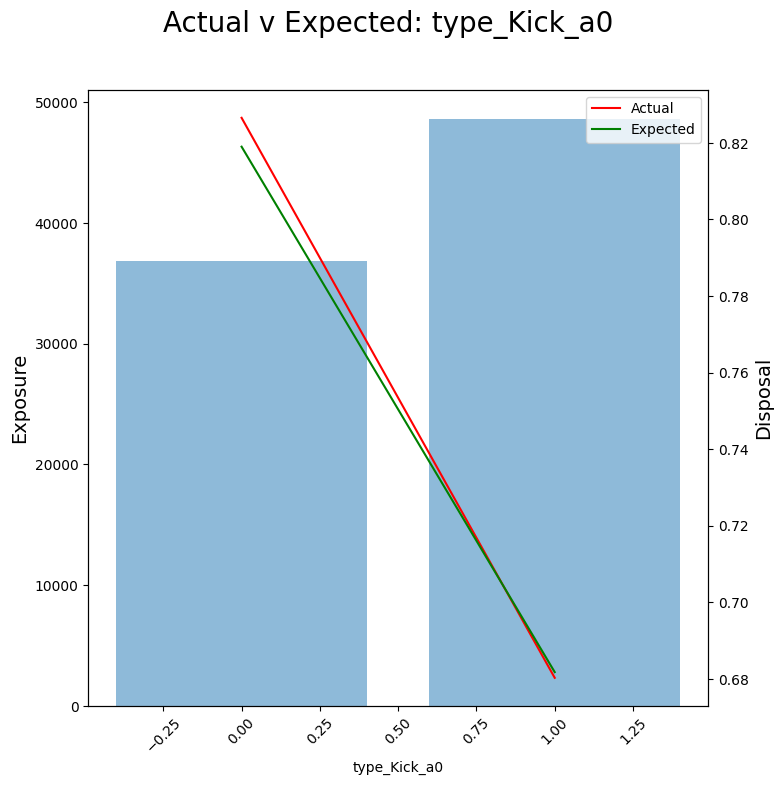

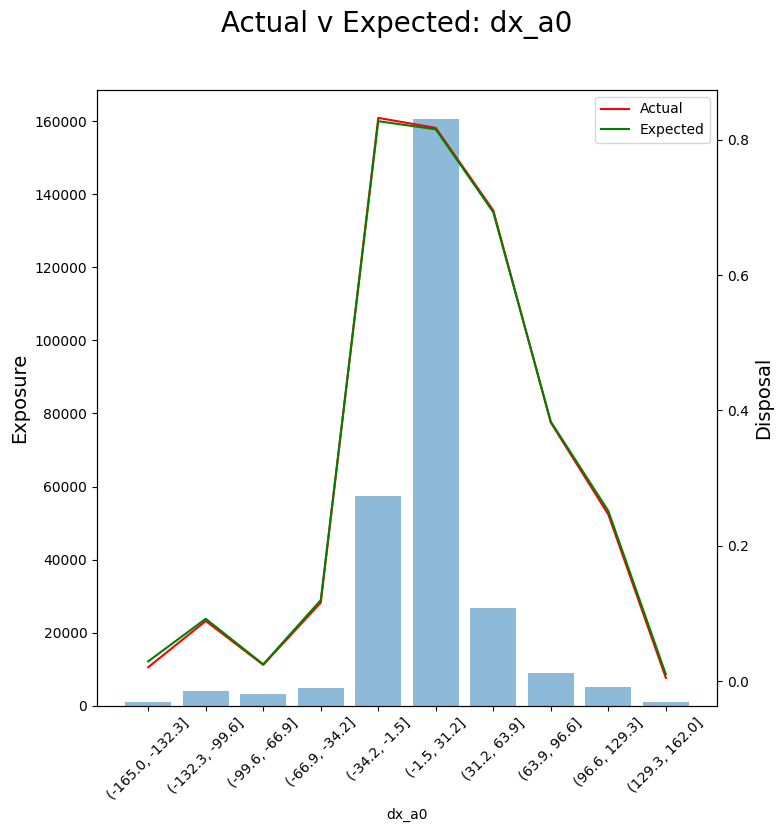

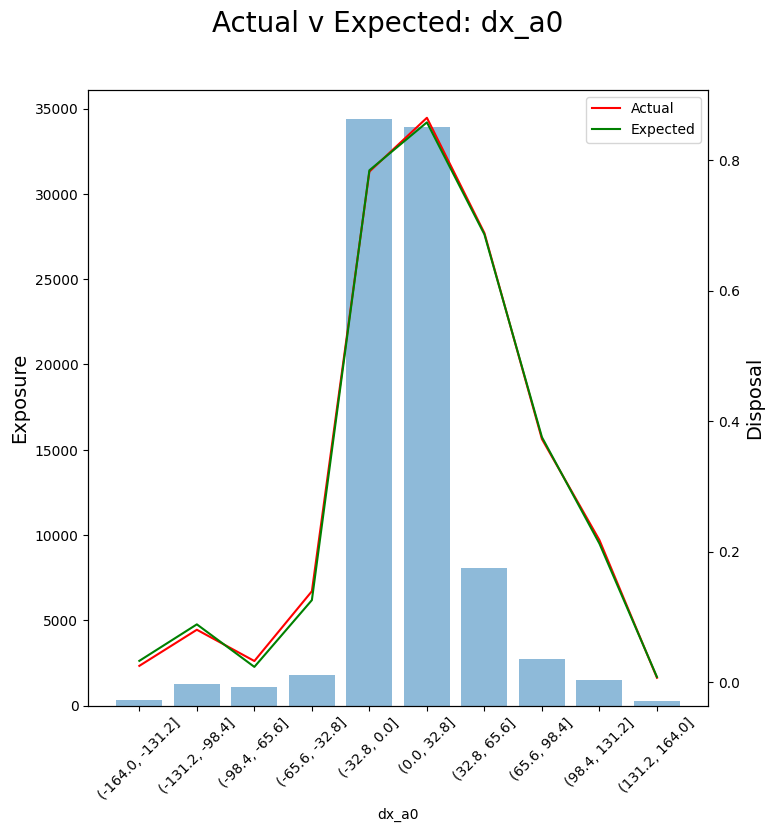

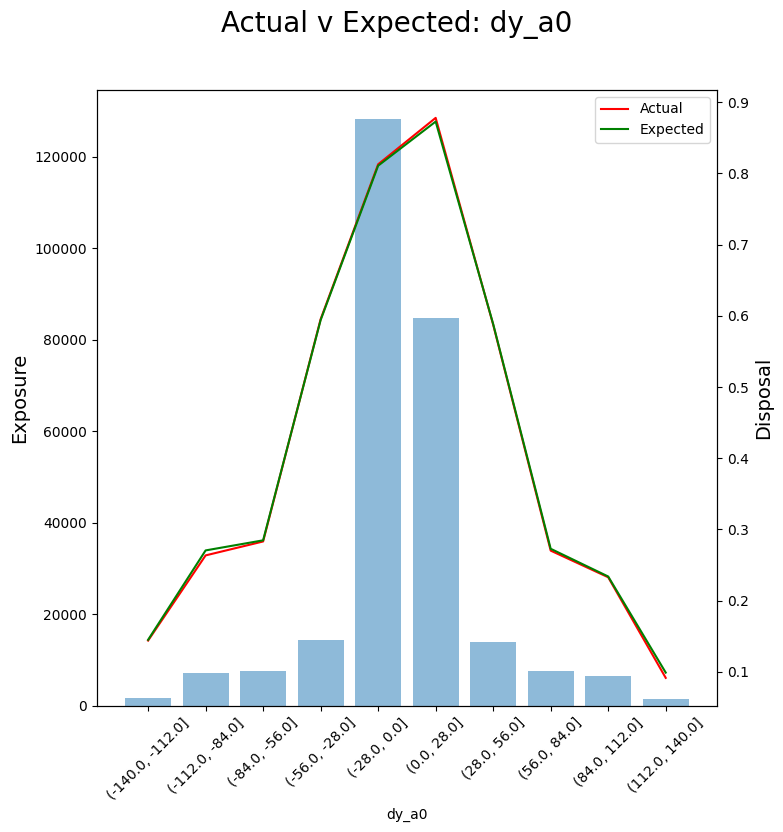

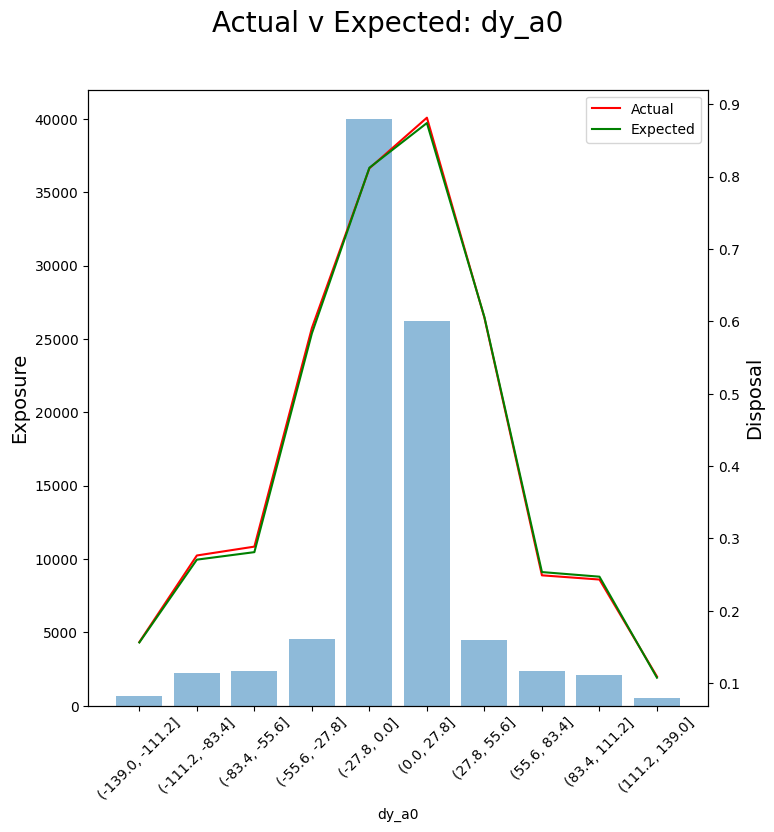

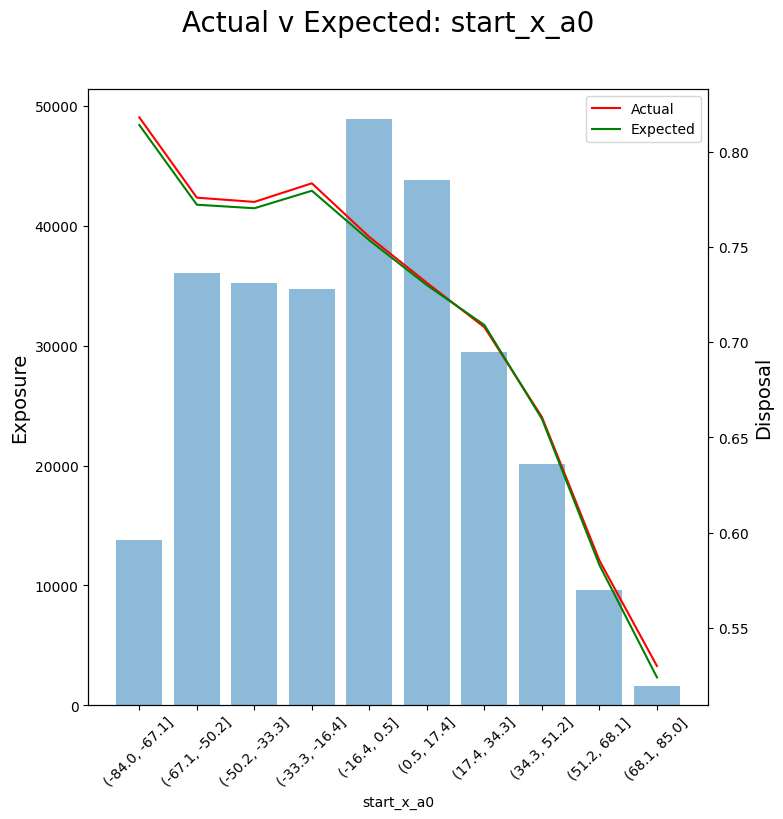

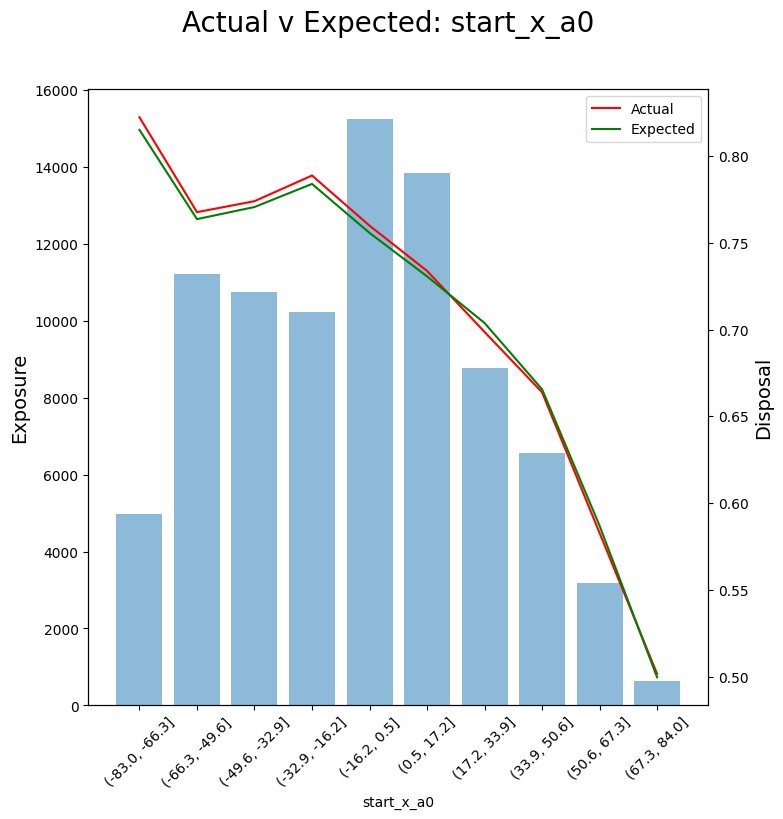

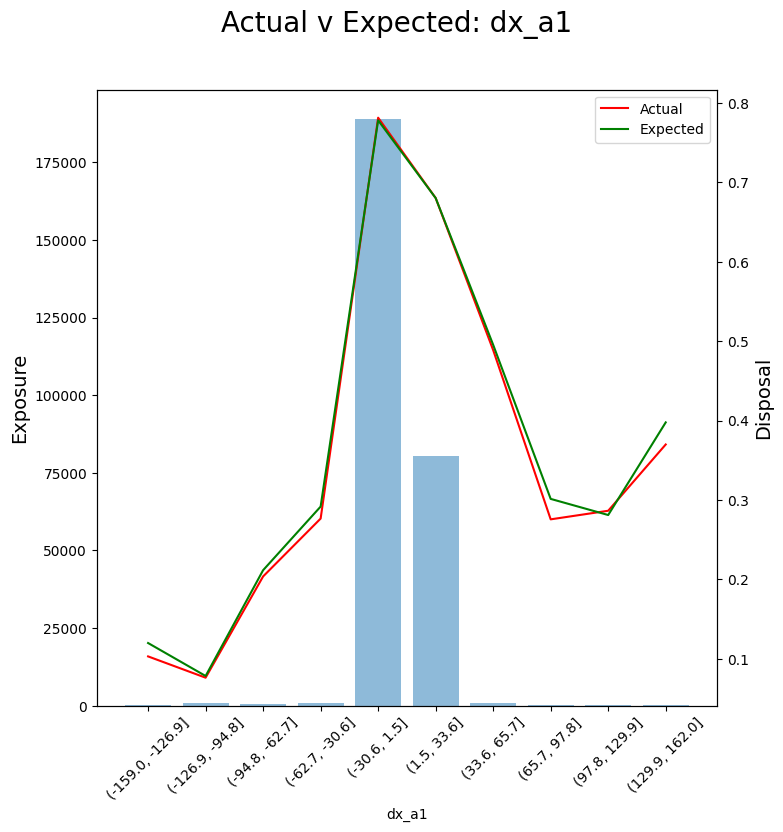

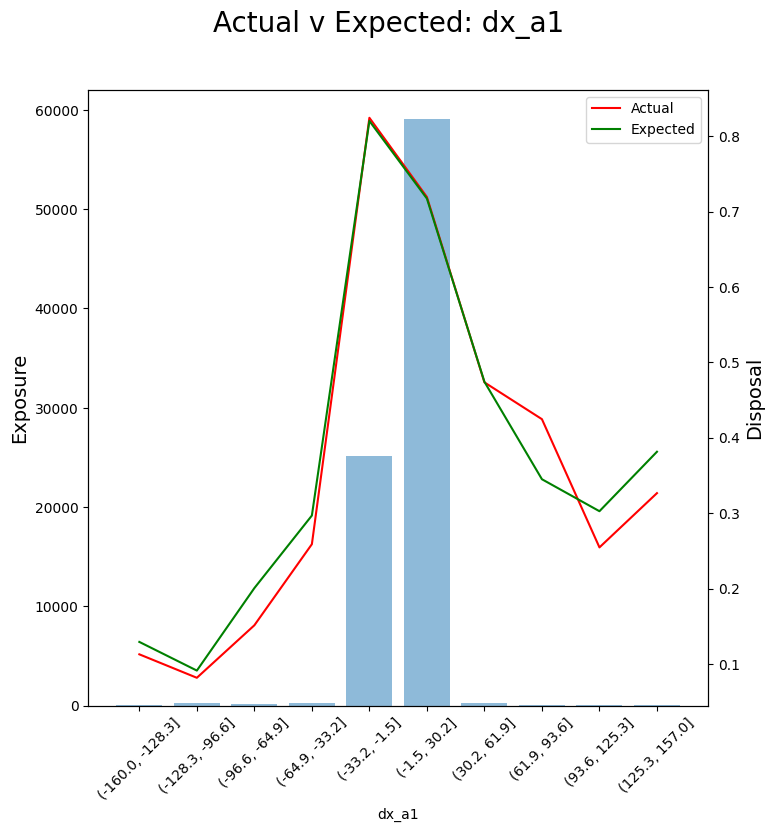

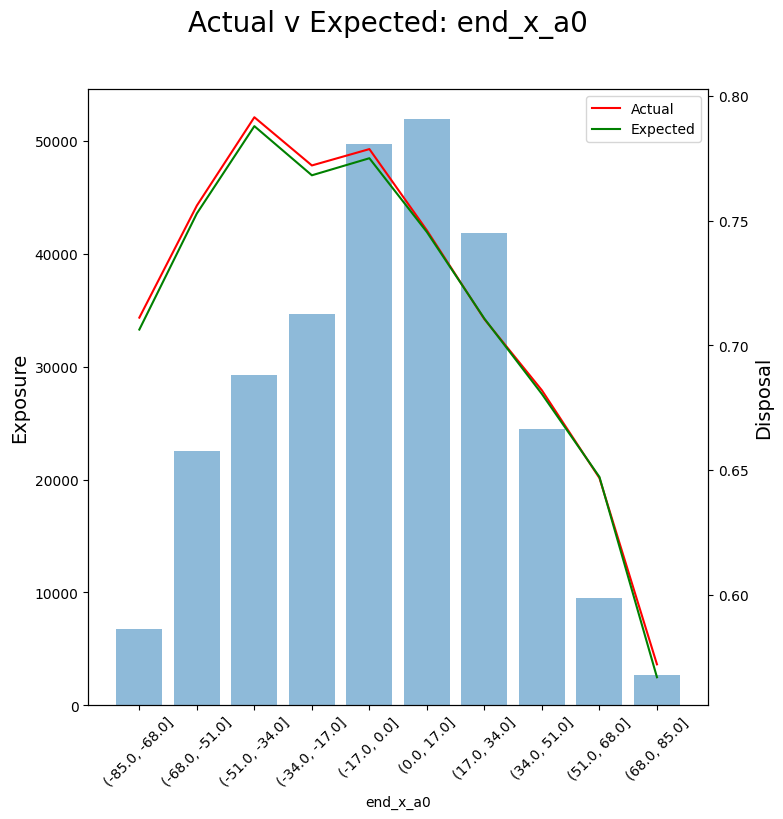

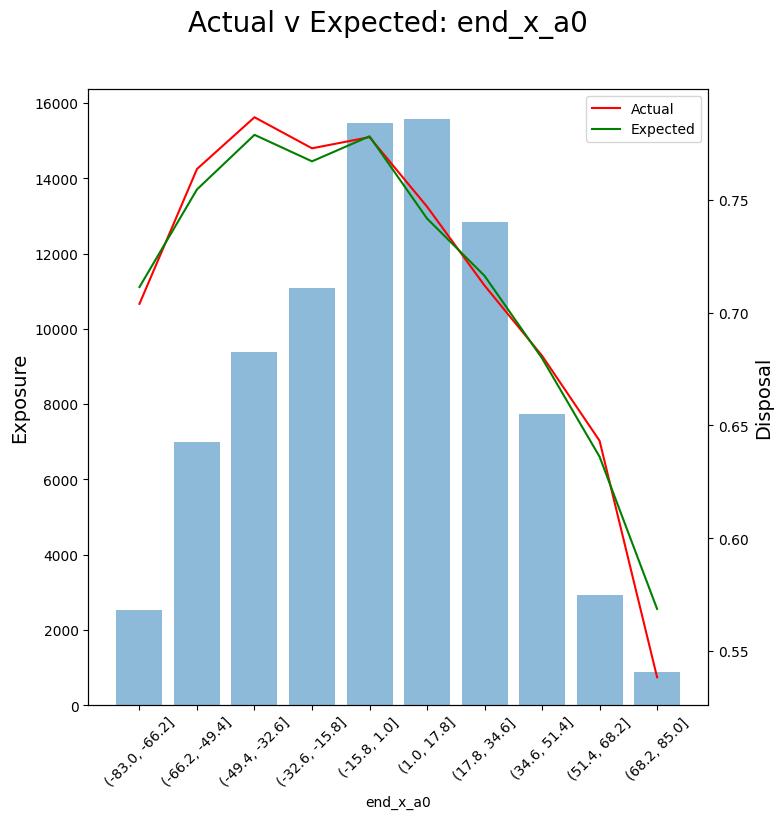

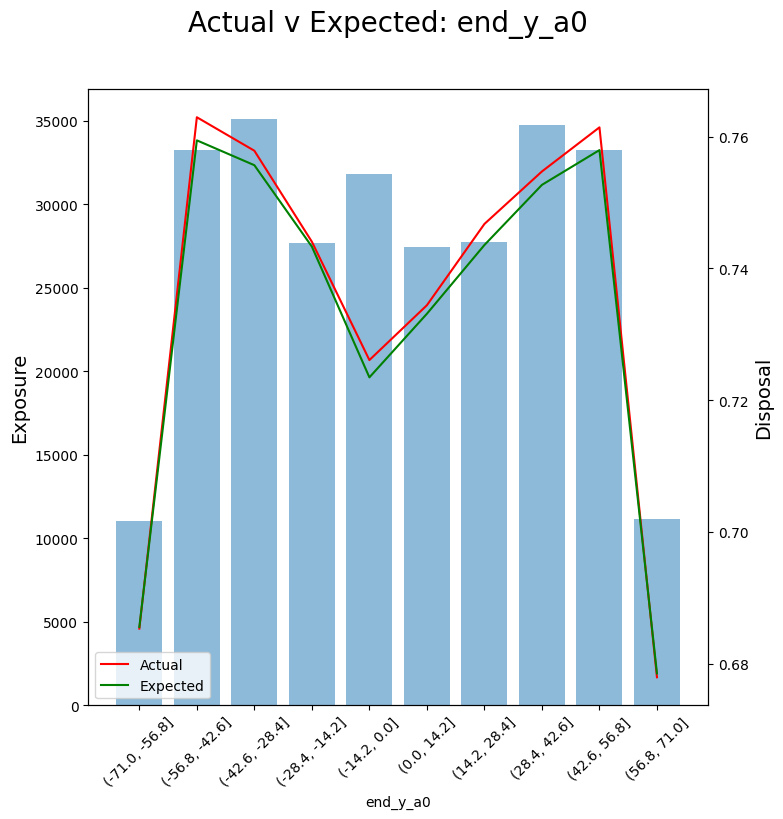

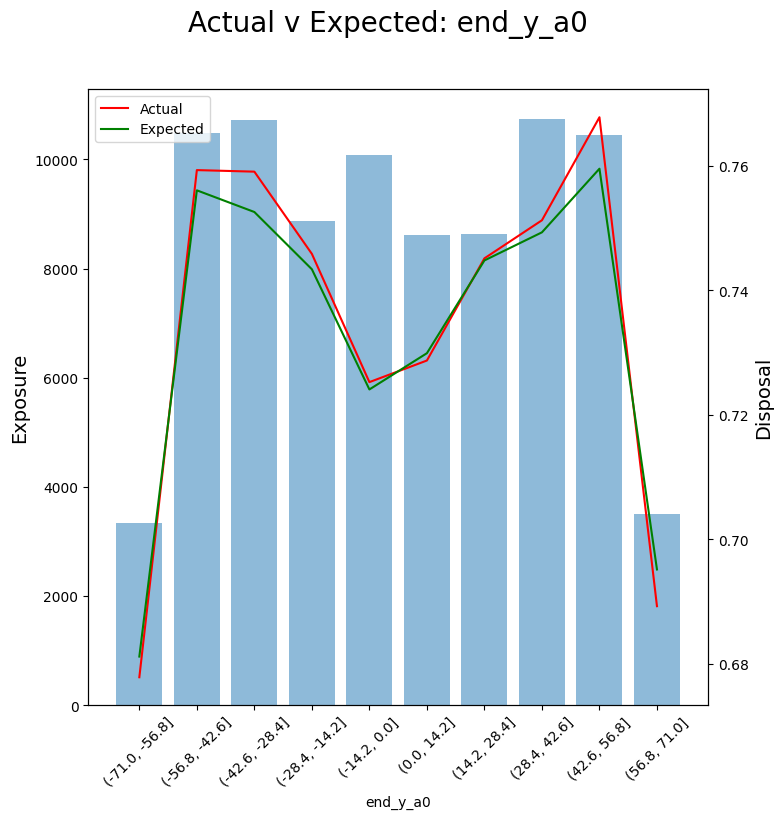

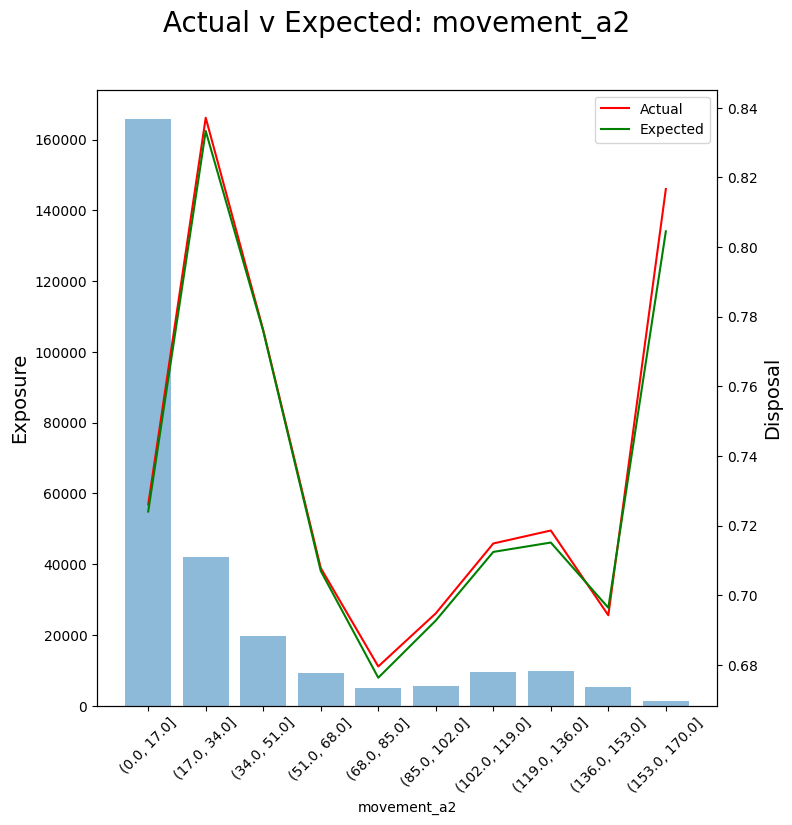

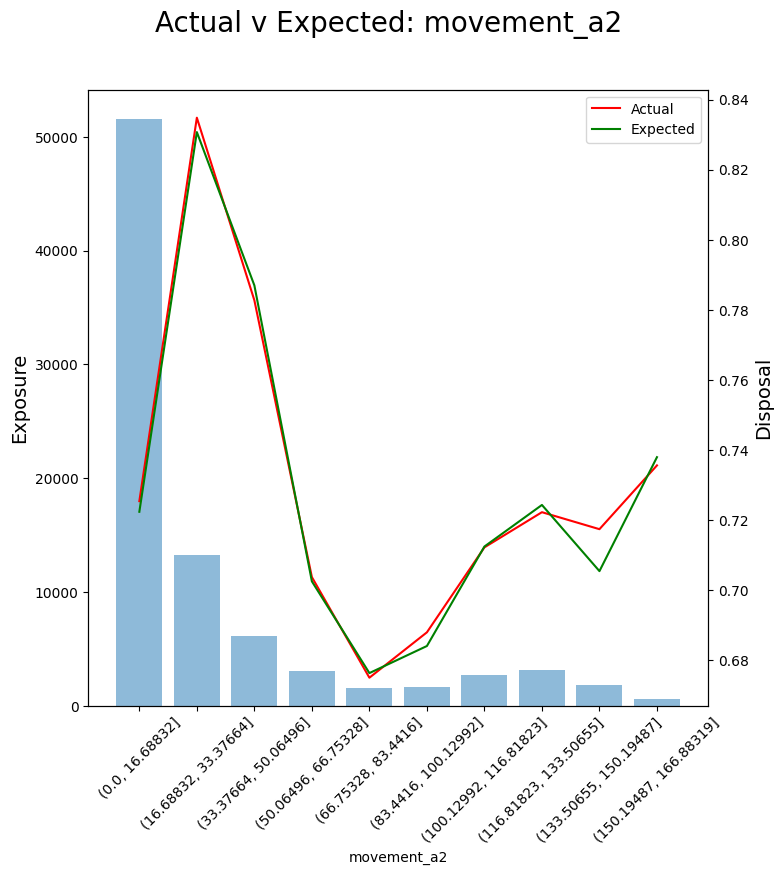

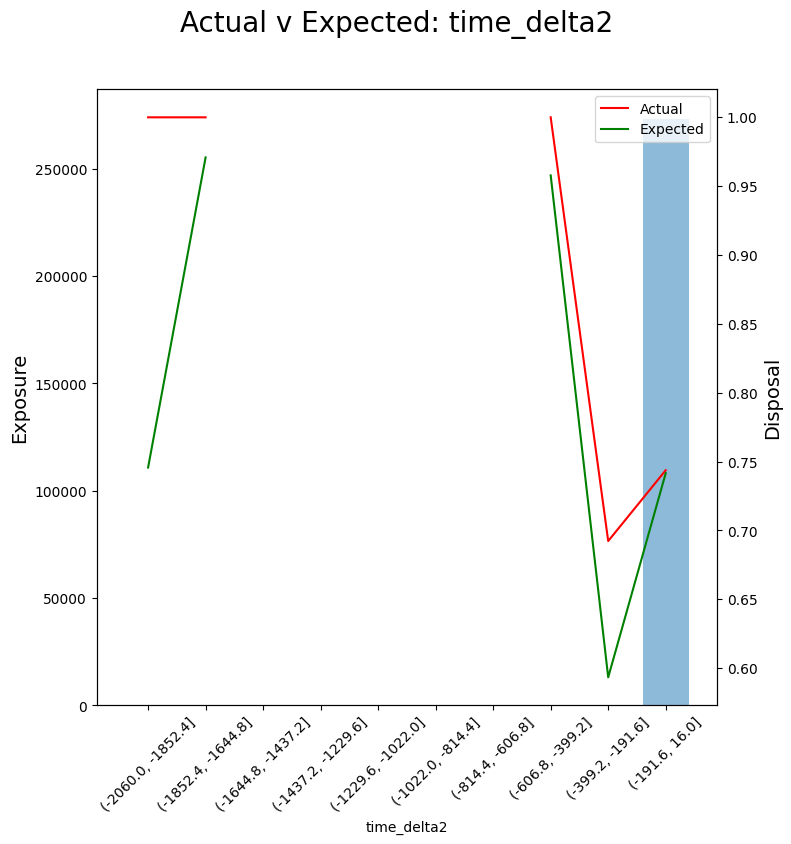

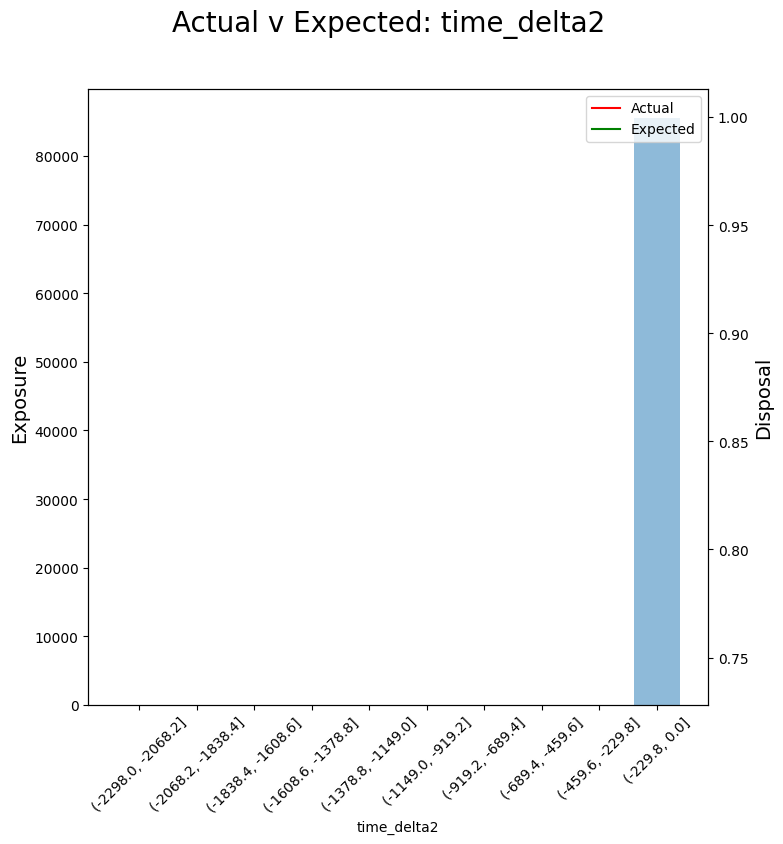

In [23]:
for col in top_10_features:
    train_xgb_evals.plot_feature_ave(col)
    test_xgb_evals.plot_feature_ave(col)

Model Metrics (for probabilities, mainly want calibration curve, logloss and brier score loss)

In [24]:
train_xgb_evals.get_log_loss(), test_xgb_evals.get_log_loss()

Expected Log-Loss: 	0.2457
Expected Log-Loss: 	0.2739


(0.24568365748398974, 0.2739235012553766)

In [25]:
train_xgb_evals.get_brier_score_loss(), test_xgb_evals.get_brier_score_loss()

Expected Brier Score: 	0.0738
Expected Brier Score: 	0.0832


(0.07382813586585536, 0.08316212190223655)

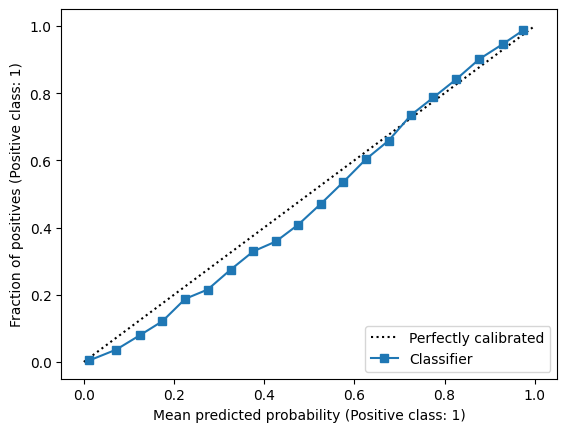

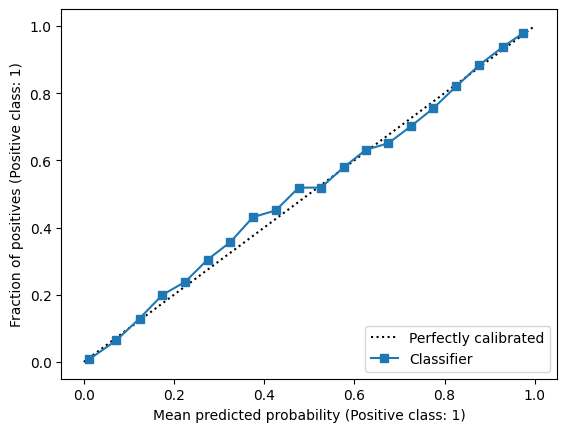

In [26]:
train_xgb_evals.display_calibration_curve(nbins=20)
test_xgb_evals.display_calibration_curve(nbins=20)